# Statistical analysis of Utrecht
The file 'utrecht.csv' gives access to ... different statistics on the region in Utrecht GM0344 from 2002 to 2019. 
(in Dutch)
 -  Bevolking aan het begin van de periode
 -  Levend geboren kinderen
 -  Overledenen
 -  Totale vestiging
 -  Vestiging vanuit een andere gemeente
 -  Immigratie
 -  Totaal vertrek inclusief administratieve correcties
 -  Vertrek naar andere gemeente
 -  Emigratie inclusief administratieve correcties
 -  Overige correcties
 -  Bevolkingsgroei
 -  Bevolkingsgroei relatief
 -  Bevolkingsgroei sinds 1 januari
 -  Bevolkingsgroei sinds 1 januari relatief
 -  Bevolking aan het einde van de periode  
 
For this assignment, functions will be written to calculate the average (or mean), median, mode and standard deviation. 
Afterwards, a trend line will be calculated for one statistic. <br>
First, loading in the file using the function written by Arno Kamphuis:

In [1]:
import csv
filename = 'utrecht.csv'

columns = {}
rows = []
data = {}


# hulp functie om te kijken of de waarde een integer is
def is_number(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

with open(filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    line_count = 0
    for row in csv_reader:
        # anders reageren als het de eerste regel is, dat zijn namelijk de kolomnamen
        if line_count == 0:
            line_count += 1
            i = 0
            for c in row:
                columns[c] = i
                data[i] = []
                i += 1
        else:
            line_count += 1
            # alleen importeren als het maanddata is, niet de cummulatieven over een jaar
            if 'JJ00' in row[columns['Perioden']]:
                pass
            else:
                rows.append(row)
                i = 0
                for c in row:
                    if is_number(c):
                        data[i].append(int(c))
                    else:
                        data[i].append(c)
                    i = i + 1

## Average (Arithmetic mean)
The sum of all values divided by the number of values.<br>
$\bar {x} = \frac {1}{n}\left(\sum _{i=1}^{n}{x_{i}}\right)$

In [2]:
def math_average(data_list):
    try:
        return sum(data_list) / len(data_list)
    except TypeError as e:
        print("Type Error:", e)
        return 0

## Median
The median is the middle value of a data set, given that the data set has been sorted from lesser to greater.
If the data set contains an equal number of values, the median is the mean of the two middle values.  <br><br>
If number of values is an odd number: $=\left(\dfrac{n+1}{2}\right)^{th}term$  
If number of values is an equal number: $=\dfrac{\left(\dfrac{n}{2}\right)^{th}term + 
\left(\dfrac{n}{2}+1\right)^{th} term}{2}$

In [3]:
def math_median(data_list):
    data_list.sort()
    amount_of_items = len(data_list)
    if amount_of_items % 2 == 0:
        median_ceiling_index = int(amount_of_items / 2)

        median_floor_index = int(median_ceiling_index - 1)

        return math_average([data_list[median_ceiling_index], data_list[median_floor_index]])

    else:
        return data_list[int(amount_of_items / 2)]

## Mode
The mode is the most frequent value in the data set. (I was not able to find a formula for this one)


In [4]:
def math_mode(data_list):
    data_set = set(data_list)
    mode, mode_count = 0, 0
    for item in data_set:
        if mode_count < data_list.count(item):
            mode_count = data_list.count(item)
            mode = item
    return mode


## Standard deviation
Standard deviation is a way to measure how spread out values are in a data set.
The full formula for calculating Standard Deviation:
$\sigma = \sqrt{\dfrac{1}{N}\sum _{i=1}^{n}\left({x_{i}-\mu}\right)^{2}}$  
>$\mu \leftarrow$ average(mean) of all values  
$x_{i} \leftarrow i_{th}$  value 

In summary, standard deviation sums up for all values $x$, the square of value minus mean. This sum then gets divided by
the amount of values.

In [5]:
import numpy as np
def math_standard_deviation(data_list):
    mean = math_average(data_list)
    minus_mean_squared = 0
    for number in data_list:
        minus_mean_squared = minus_mean_squared + (number - mean) ** 2
    return np.sqrt(minus_mean_squared / len(data_list))

### The above mentioned statistical tools utilised on two variables:
1. : Vestiging vanuit andere gemeente : Immigration to municipality
2. : Vertrek naar andere gemeente : Emigration from municipality


In [6]:
stats = [data[columns["VestigingVanuitEenAndereGemeente_5"]],data[columns["VertrekNaarAndereGemeente_8"]]]
counter = 1
for stat in stats:
    print(counter, "Average: {}".format(math_average(stat)), "Median: {}".format(math_median(stat)),
          "Mode: {}".format(math_mode(stat)), "Standard Deviation: {}".format(math_standard_deviation(stat)), sep=' | ')
    counter += 1

1 | Average: 1628.009708737864 | Median: 1590.0 | Mode: 1574 | Standard Deviation: 349.1845978861125
2 | Average: 1465.6456310679612 | Median: 1389.5 | Mode: 1239 | Standard Deviation: 294.23418065112133


As you can see, the average immigration rate is higher than the average emigration rate. We can infer from this that,
on average, more people move into rather than out of Utrecht. We can also see that both the median and mode of immigration are
larger than those of emigration. From this fact, we can infer that more people moving to Utrecht than leaving it has 
been true over a relatively long period.
## Trend-line and graphing
For the purposes of this assignment, linear trend lines will be used.  
The formula for a linear trend line:  
$y = \alpha x + \beta$  
<br><br>


### Calculating the trend-line using Python
For the purposes of this script, a function must be defined that can multiply lists with one another. <br>
$\begin{vmatrix} x_{1}\\x_{2}\\x_{3} \end{vmatrix} \cdot \begin{vmatrix} y_{1}\\y_{2}\\y_{3} \end{vmatrix} = 
\begin{vmatrix} x_{1} \times y_{1} \\ x_{2} \times y_{2} \\ x_{3} \times y_{3} \end{vmatrix}$

In [7]:
def math_multiply_list(list1, list2):
    output_list = list()
    for i in range(len(list1)):
        output_list.append(list1[i] * list2[i])
    return output_list

### Slope $\alpha$:
The mean of the product of all values of 
$x$ and $y$ is detracted from the product of the mean of $y$ and $x$. This, in turn, gets divided by the mean of $x$ 
squared minus the mean of ${x_{i}}^{2}$. All of this result in $\alpha$. <br>
$\alpha = \dfrac{\left(\frac {1}{n}\left(\sum _{i=1}^{n}{x_{i}}\right)\cdot
\frac {1}{n}\left(\sum _{i=1}^{n}{y_{i}}\right)\right) - \frac {1}{n}\left(\sum _{i=1}^{n}{x_{i}\cdot y_{i}}\right)}
{\frac {1}{n}\left(\sum _{i=1}^{n}{x_{i}}\right)^{2} - \frac {1}{n}\left(\sum _{i=1}^{n}{{x_{i}}^{2}}\right)}$

In [8]:
def trend_slope(x, y):
    a = ((math_average(x) * math_average(y)) - math_average(math_multiply_list(x, y))) / \
        (math_average(x) ** 2 - math_average(math_multiply_list(x, x)))
    return a

### Intersection $\beta$
$\beta$ is then simply the product of $\alpha$ and the mean of $x$ detracted from the mean of $y$. <br><br>
$\beta = \frac {1}{n}\left(\sum _{i=1}^{n}{y_{i}}\right) - \alpha \cdot \frac {1}{n}\left(\sum _{i=1}^{n}{x_{i}}\right)$
<br><br>

In [9]:
def trend_intercept(data_list, slope, x):
    return math_average(data_list) - slope * math_average(x)


Finally, the trend line function that puts these two together and generates a line for plotting.

In [10]:
def trendline(data_list, **kwargs):
    # Thanks in part to:
    # https://math.stackexchange.com/questions/204020/what-is-the-equation-used-to-calculate-a-linear-trendline
    # https://pythonprogramming.net/how-to-program-best-fit-line-machine-learning-tutorial/
    x = kwargs.get("x")
    if not x:
        x = list(range(1, len(data_list) + 1))
    # print("trend",len(data_list), len(x))
    y = data_list
    slope = trend_slope(x, y)
    intercept = trend_intercept(data_list, slope, x)
    if kwargs.get("SE"):
        line = [(slope * x_index) + intercept + int(kwargs.get("SE")) for x_index in x]
    else:
        line = [(slope * x_index) + intercept for x_index in x]

    return line

Up next is a function to plot the data

In [11]:
import matplotlib.pyplot as plt
from matplotlib import style
def plot_trendline(data_list, x_list, statistic_string, **kwargs):
    SD = 2*math_standard_deviation(data_list)
    plt.rcParams['figure.figsize'] = [15,5]
    style.use('ggplot')
    plt.plot(x_list, data_list, 'ro', label=statistic_string)
    if kwargs.get("split"):
        trendline1 = trendline(data_list[:53])
        # print(len(trendline1))
        trendline2 = trendline(data_list[53:104], x=range(53,104))
        # print(len(trendline2))
        trendline3 = trendline(data_list[104:155], x=range(104,155))
        # print(len(trendline3))
        trendline4 = trendline(data_list[155:207], x=range(155,206))
    
        plt.plot(x_list[:53], trendline1, linewidth=3.0, color='blue', label="Trend line: {}".format(statistic_string))
        plt.plot(x_list[53:104], trendline2, linewidth=3.0, color='blue')
        plt.plot(x_list[104:155], trendline3, linewidth=3.0, color='blue')
        plt.plot(x_list[155:207], trendline4, linewidth=3.0, color='blue')
        
        plt.title("{} plotted over a period of {} months (m:m:m:m) : 53;51;51;51".format(statistic_string, len(x_list)))
        if kwargs.get("comp"):
            # Small something I wrote to see if a trend line composed of trend lines equals the original trend line
            # Unused in Jupyter Notebook
            trendline_full = list()
            trendline_full.extend(trendline1)
            trendline_full.extend(trendline2)
            trendline_full.extend(trendline3)
            trendline_full.extend(trendline4)
            # print(len(trendline_full), len(x_list))
            trendline_full = trendline(trendline_full)
            plt.plot(x_list, trendline_full, linewidth=3.0, label="Trend line: {}".format(statistic_string))
            
        
        
    else:
        plt.title("{} plotted over a period of {} months".format(statistic_string, len(x_list)))
        trendline_full = trendline(data_list)
        plt.plot(x_list, trendline_full, linewidth=3.0, color='blue', label="Trend line: {}".format(statistic_string))
        if SD:
            trendline_small = trendline(data_list, SE=(-SD))
            trendline_big = trendline(data_list, SE=SD)
            plt.plot(x_list, trendline_big, linewidth=3.0, color='green', label="Trend line $+2 \sigma$")
            plt.plot(x_list, trendline_small, linewidth=3.0, color='green', label="Trend line $-2 \sigma$")
        plt.legend()
    plt.xlabel("Time (months)")
    plt.ylabel(statistic_string)
    plt.xticks(data[columns['Perioden']][0::12])
    plt.xticks(rotation=90)
    plt.show()

In the first graph there are four trend lines, the first calculated over 53 months, the next three over 51 months. A
 decline in 'overledenen' (deaths) can be witnessed per period of time. We can see, however, that in 2015 there was a 
 small increase in mortality rate, which was quickly corrected in the coming months.

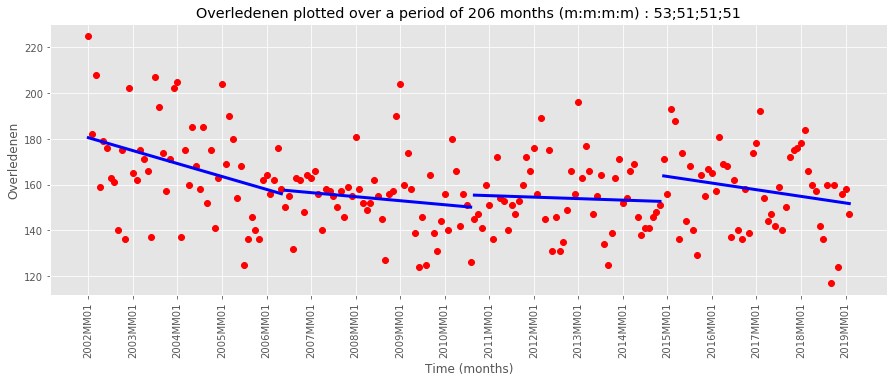

In [12]:
%matplotlib inline
plot_trendline(data[columns['Overledenen_3']], data[columns['Perioden']], 'Overledenen', split=True)

The second plot is a trend line over the full 206 month period. It is accompanied by two green lines. The two green 
lines are the trend line plus or minus 2 times the standard deviation of the dataset, respectively. 95% of data in the
dataset falls between the green lines.    <br> In both plots, we can see a steady, albeit slow, decline in mortality 
  rates.<br><br>
The decline in 'overledenen' means the mortality
rate has decreased. This could be attributed to a myriad of reasons, such as better health care or relocation of the 
elderly to other municipalities.


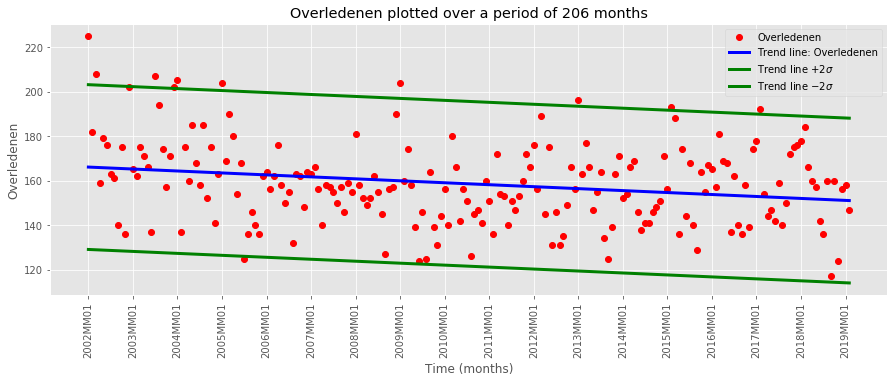

In [13]:
%matplotlib inline
plot_trendline(data[columns['Overledenen_3']], data[columns['Perioden']], 'Overledenen')


# Standard error, error bars and box-plots
In this part of the assignment, I will be calculating the standard error  and plotting box-plots for the 
following two statistics:

1. : Vestiging vanuit andere gemeente : Immigration to municipality
2. : Vertrek naar andere gemeente : Emigration from municipality

## Standard error
Formula for the standard error:
$\sigma^{-}_{x} = \dfrac{\sigma}{\sqrt{n}}$<br>
Where:<br>
$\sigma^{-}_{x} \leftarrow $ standard error of mean  
$\sigma \leftarrow$ standard deviation  
$n \leftarrow$ number of observations of sample



In [14]:
def math_standard_error(data_list):
    """Calculates standard error using formula: se = s / sqrt(n)"""
    standard_deviation = math_standard_deviation(data_list)
    number_of_observations = len(data_list)
    
    return standard_deviation / (number_of_observations ** 0.5)


In [15]:
for counter, stat in enumerate(stats):
    print(f"{counter + 1}, Standard error: {math_standard_error(stat)}") 

1, Standard error: 24.32884374293976
2, Standard error: 20.500266759268015


## Box plot
Average mean per year

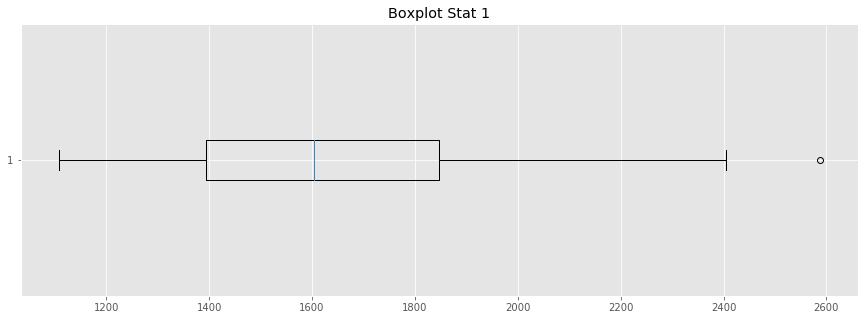

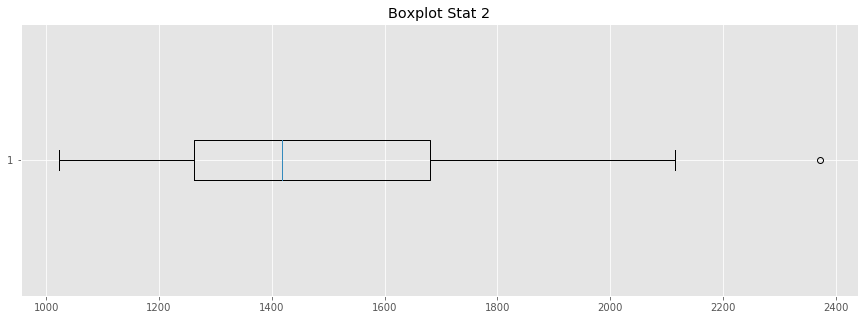

In [16]:
%matplotlib inline
from itertools import islice
plt.rcParams['figure.figsize'] = [15,5]
style.use('ggplot')
    
for counter, stat in enumerate(stats):
    start = 0
    stop = 12
    mean_list = []
    for i in range(len(stat[0::12])):
        temp_data = list(islice(stat, start, stop))
        start = stop
        stop = stop + 12
        temp_mean = math_average(temp_data)
        mean_list.append(temp_mean)
    
    plt.boxplot(mean_list, vert=False)
    plt.title(f"Boxplot Stat {counter + 1}")
    plt.show()


## An attempt at error bars
In order to plot error bars, you need to calculate a confidence interval. The confidence interval are the values within
95% of values exist. The following formula is used to calculate said number:
$1.69 \times \sigma^{-}_{x}$  
Where:
$1.69 \leftarrow $ 95% of values, assuming normal distribution  
$\sigma^{-}_{x} \leftarrow$ standard error 

The upper limit of the confidence interval being:
$\bar {x} + 1.69 \times \sigma^{-}_{x} $

And the lower limit of the confidence interval being:
$\bar {x} - 1.69 \times \sigma^{-}_{x} $
Where:
$\bar{x} \leftarrow$ average(mean)

Matplotlib calculates the lower and upper limit for you, only having you enter $1.69 \times \sigma^{-}_{x}$

In [17]:
def math_confidence_interval(data_list, calculate_limits = False):
    """Calculates confidence interval using 1.69 * se. If calculate_limits is True, return list containing upper and 
    lower limit."""
    standard_error = math_standard_error(data_list)
    interval = 1.69 * standard_error
    print(interval)
    if calculate_limits:
        mean = math_average(data_list)
        upper = mean + interval
        lower = mean - interval
        return upper, lower
    else:
        return interval

16.188024385543297
11.61248905383609
10.487041107582712
7.553862924426052
7.4304321537001305
7.0186261944491255
8.601985020697043
10.556552028988476
4.56931284849346
5.571229723909622
6.999643356490069
8.028735285073097
6.470547102312194
20.69096026644692
16.57989787837691
35.63229451878746
33.045454564298424
36.44781903626059


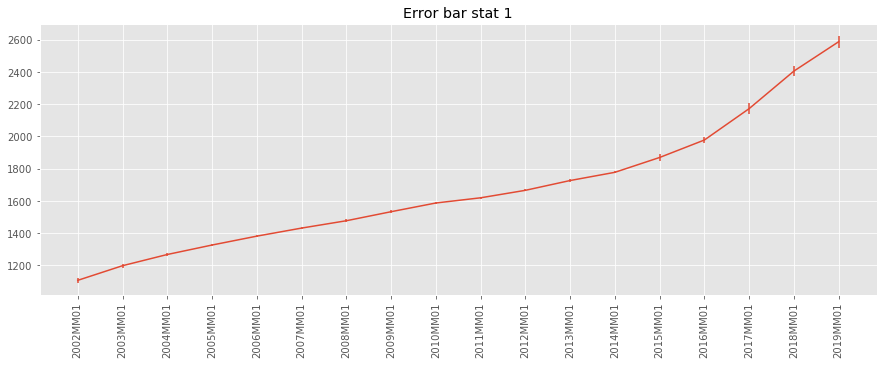

21.878629444937562
12.801832630218597
6.499220555118444
3.884847783792918
3.3848865140448896
3.4630875621276127
3.3198054313245313
7.140842568004039
6.34792352678038
13.133730876932313
4.760638865468311
9.993131492453355
7.975030767385212
13.249502897296297
11.926568487189837
15.09262063676104
47.447597890745236
63.933059620981695


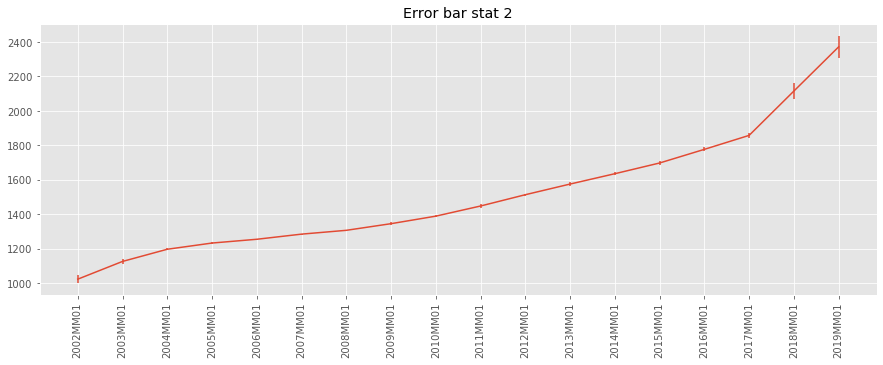

In [18]:
%matplotlib inline   
plt.rcParams['figure.figsize'] = [15,5]
style.use('ggplot')
for counter, stat in enumerate(stats):
    start = 0
    stop = 12
    mean_list = []
    confidence_interval_list = []
    for i in range(len(stat[0::12])):
        temp_data = list(islice(stat, start, stop))
        start = stop
        stop = stop + 12
        temp_mean = math_average(temp_data)
        mean_list.append(temp_mean)
        
        temp_confidence_interval = math_confidence_interval(temp_data)
        confidence_interval_list.append(temp_confidence_interval)
    
    plt.errorbar(data[columns['Perioden']][0::12],mean_list, yerr=confidence_interval_list)
    plt.xticks(rotation=90)
    plt.title(f"Error bar stat {counter + 1}")
    plt.show()